In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("data.csv")

In [2]:
X = df[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]
y = (df['Grades'] < 50).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(eval_metric='logloss', importance_type='gain')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(f"\nXGBoost Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


XGBoost Model Accuracy: 0.9676

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90        48
           1       0.97      0.99      0.98       230

    accuracy                           0.97       278
   macro avg       0.96      0.92      0.94       278
weighted avg       0.97      0.97      0.97       278



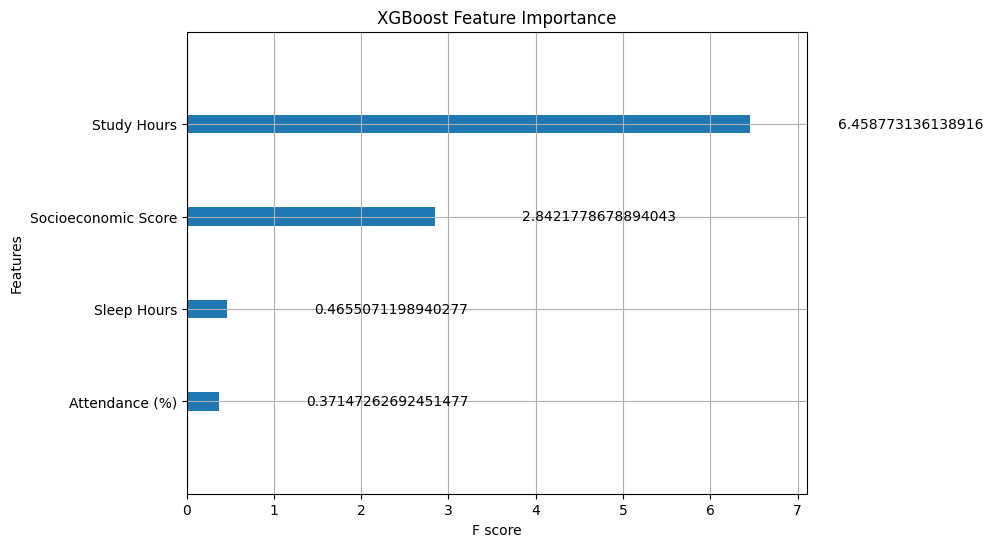

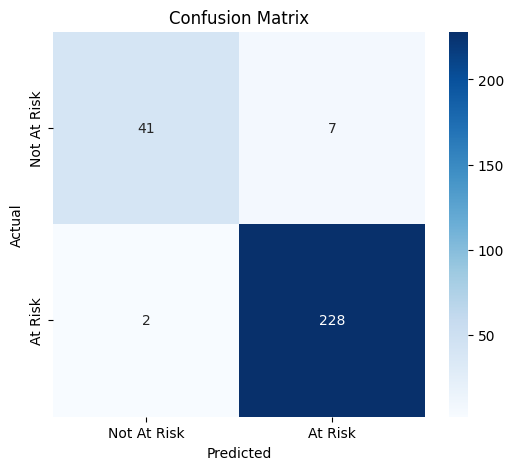


Risk Report for Student 45
Socioeconomic Score: 0.4485, Study Hours: 3.0, Sleep Hours: 6.2, Attendance: 61.0%
Grades: 35.0
Predicted Status: At Risk


In [4]:
plt.figure(figsize=(8, 6))
plot_importance(xgb, importance_type='gain', ax=plt.gca())
plt.title("XGBoost Feature Importance")
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not At Risk', 'At Risk'], yticklabels=['Not At Risk', 'At Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def generate_risk_report(student_id):
    student = df.iloc[student_id]
    print(f"\nRisk Report for Student {student_id}")
    print(f"Socioeconomic Score: {student['Socioeconomic Score']}, Study Hours: {student['Study Hours']}, Sleep Hours: {student['Sleep Hours']}, Attendance: {student['Attendance (%)']}%")
    print(f"Grades: {student['Grades']}")
    risk_status = 'At Risk' if y.iloc[student_id] == 1 else 'Not At Risk'
    print(f"Predicted Status: {risk_status}")
    
generate_risk_report(45)